# General analysis from association rules

## Run all year-by-year notebooks to generate association rules

### Run analysis for 2018

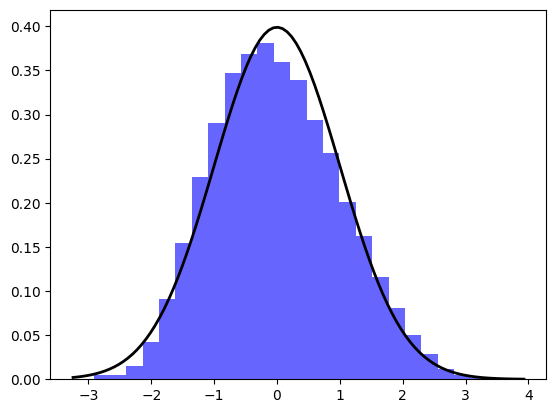

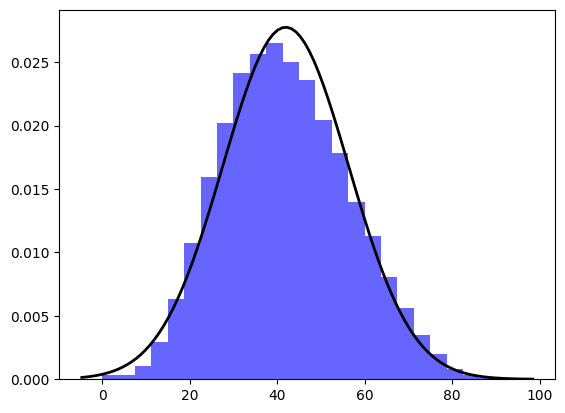

In [ ]:
%run 'analysis-2018.ipynb'

### Run analysis for 2019

In [ ]:
%run 'analysis-2019.ipynb'

## Import all rules results

In [ ]:
%run '../scripts/import-all-rules-results.py'

all_rules

## ECDF - Support x Association Rules Qty

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", complementary=True, x="support", hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty

In [ ]:
# charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confidence")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

In [ ]:
all_high_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="support", complementary=True,  hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

In [ ]:
all_low_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="support", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## Filter by relevant rules (lift > 1.1)

In [ ]:
relevant_rules_table_2018 = rules_table_2018.query("lift > 1.1")
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")

print("2018: " + str(relevant_rules_table_2018['items_base'].count()))
print("2019: " + str(relevant_rules_table_2019['items_base'].count()))

## Recurring rules

In [ ]:
intersec_all_years = pd.merge(relevant_rules_table_2018, relevant_rules_table_2019, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_all_years

## Save results to a new CSV file

In [ ]:
import os
intersec_all_years.to_csv('results/intersection-all-years.csv')

## View data of interest

In [ ]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

In [ ]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [ ]:
all_high = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [ ]:
all_low = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()